<a href="https://colab.research.google.com/github/kinderasteroid/Neural-Networks-Classification/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Classification

In [13]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt


n_samp = 1000

X,y = make_circles(n_samp,noise=0.03,random_state=42)
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Label":y})
circles






,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


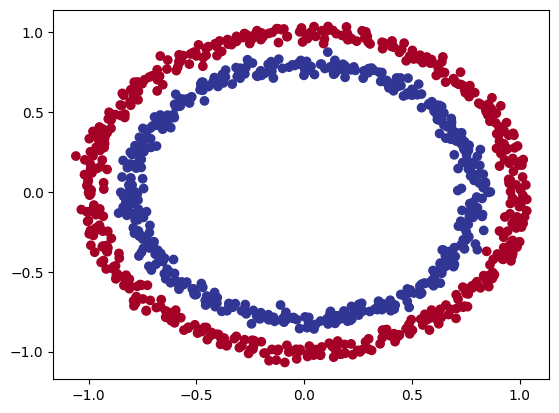

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [4]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=200)

Epoch 1/200
32/32 [==============================] - 6s 3ms/step - loss: 1.4679 - accuracy: 0.4921
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.4981
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.4947
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4966
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4974
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5044
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4954
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4822
Epoch 9/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4882
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5016
Epoch 11/

In [16]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([tf.keras.layers.Dense(4,activation="relu"),tf.keras.layers.Dense(4,activation="relu"),tf.keras.layers.Dense(1,activation="sigmoid")])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=['accuracy'])

history = model2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5040
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5510
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.5530
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.5560
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.5690
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.5690
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.5760
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.5760
Epoch 11/

In [6]:
model2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.9870


[0.27280402183532715, 0.9869999885559082]

#Replicate the Sigmoid Function


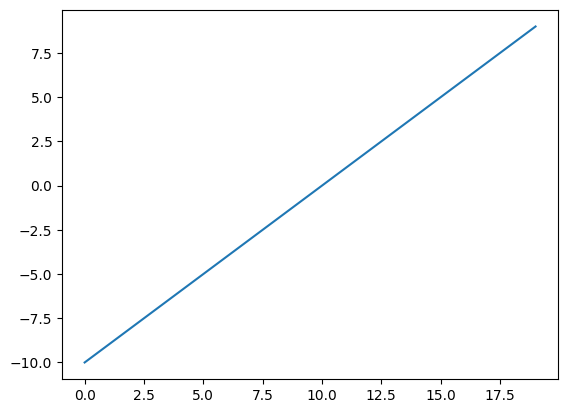

In [7]:

l= tf.cast(tf.range(-10,10),tf.float32)
plt.plot(l)

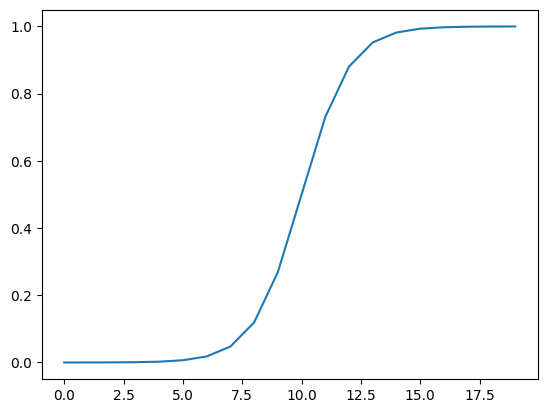

In [8]:
def sigmoid(X):
  return (1/(1+tf.math.exp(-X)))

plt.plot(sigmoid(X))

In [9]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


#Replicate the Relu Function


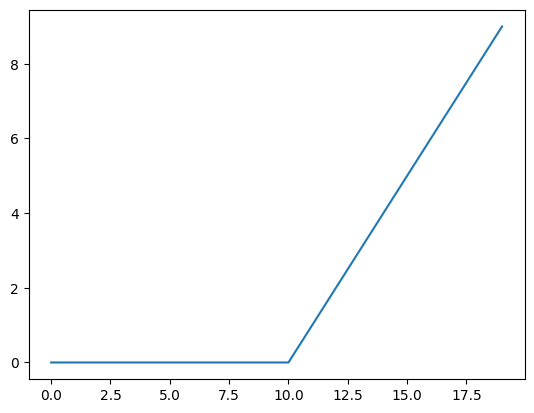

In [10]:

def relu(X):
    return(tf.maximum(X,0))

plt.plot(relu(X))

#Evaluating the Model

<Axes: >

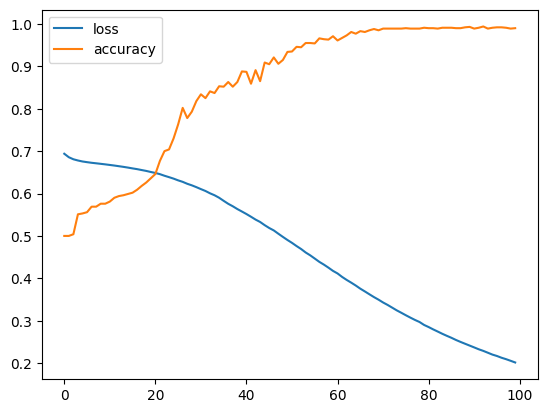

In [18]:
len(X)
pd.DataFrame(history.history).plot()

#Find the Best Learning Rate

In [22]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([tf.keras.layers.Dense(4,activation="relu"),tf.keras.layers.Dense(4,activation="relu"),tf.keras.layers.Dense(1,activation="sigmoid")])

model4.compile(loss = tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history4 = model4.fit(X,y,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 0.7407 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7390 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7371 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7352 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7332 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7312 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7290 - accuracy: 0.4980 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7267 - accuracy: 0.4890 - lr: 2.2387e-04
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss:

#Plot the lr Rate against accuracy and Loss

<Axes: >

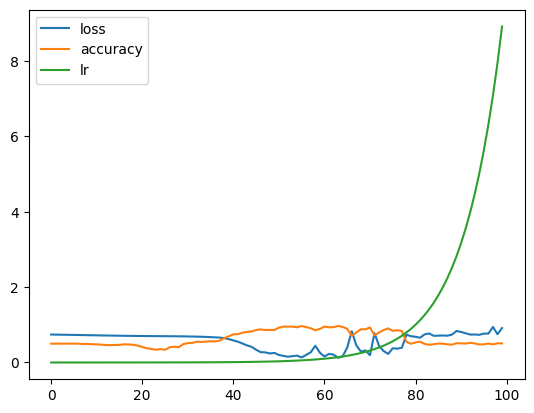

In [23]:
pd.DataFrame(history4.history).plot()

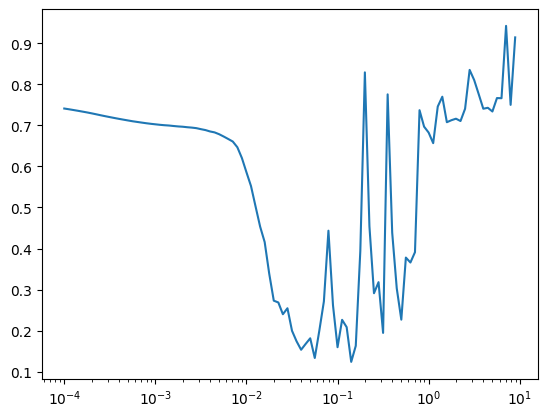

In [27]:
lrs = 1e-4*(10**(tf.range(100)/20))

plt.semilogx(lrs,history4.history['loss'])